## Compare present and future ozone RFs, Fig 2c,d

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams['font.size'] = 20

In [3]:
#imported from o3_conc_rf_future.ipynb and rf_o3_all_present_updated.ipynb

o3_rfs_future = [1888.4362, 1922.0923, 1897.7635, 2207.8875, 2302.1387, 1916.3667,
       1902.5773, 2212.7427, 2310.3464, 1924.557 , 1498.0726, 1961.9884,
       1519.4943, 1920.7054, 1503.5554, 1971.0156, 1529.1556, 1977.83  ,
       1982.4741, 1256.2987, 1629.65  , 1645.6039, 1270.6786, 1240.5962,
       1612.4803, 1276.2083, 1240.677 , 1612.4865, 1259.9331, 1633.6683,
       1652.9912, 1277.2917]

member_labs_future = ['EMAC_C1.2_All_SSP3', 'EMAC_C1_SSP3', 'MOZART3_C1.1_NOx_SSP1',
       'MOZART3_C1.1_NOx_SSP1_with_SSP3_BG', 'MOZART3_C1.1_NOx_SSP3',
       'MOZART3_C1.1_NOx_SSP3_with_SSP1_BG', 'MOZART3_C1_SSP1',
       'MOZART3_C1_SSP1_with_SSP3_BG', 'MOZART3_C1_SSP3',
       'MOZART3_C1_SSP3_with_SSP1_BG', 'LMDZ-INCA_C1.1_All_SSP1',
       'LMDZ-INCA_C1.1_All_SSP3', 'LMDZ-INCA_C1.1_All_SSP3_with_SSP1_BG',
       'LMDZ-INCA_C1.2_All_SSP3', 'LMDZ-INCA_C1_SSP1', 'LMDZ-INCA_C1_SSP3',
       'LMDZ-INCA_C1_SSP3_with_SSP1_BG',
       'LMDZ-INCA_with_SSP3_BG_C1.1_All_SSP1',
       'LMDZ-INCA_with_SSP3_BG_C1_SSP1', 'OsloCTM3_C1.1_All_SSP1',
       'OsloCTM3_C1.1_All_SSP1_with_SSP3_BG', 'OsloCTM3_C1.1_All_SSP3',
       'OsloCTM3_C1.1_All_SSP3_with_SSP1_BG', 'OsloCTM3_C1.2_All_SSP1',
       'OsloCTM3_C1.2_All_SSP3', 'OsloCTM3_C1.2_All_SSP3_with_SSP1_BG',
       'OsloCTM3_C1.2_NOx_SSP1', 'OsloCTM3_C1.2_NOx_SSP3', 'OsloCTM3_C1_SSP1',
       'OsloCTM3_C1_SSP1_with_SSP3_BG', 'OsloCTM3_C1_SSP3',
       'OsloCTM3_C1_SSP3_with_SSP1_BG']

# deleted GEOS-Chem
o3_rfs_present = [1706.5232, 1688.8623, 2141.826 ,
       2136.427 , 2111.4033, 1719.3036, 1713.6224, 1687.8906, 1536.9392,
       1532.4331, 1513.0376]

member_labs_present = ['EMAC_A1', 'EMAC_B1.2_All', 'MOZART3_A1', 'MOZART3_B1.1_NOx',
       'MOZART3_B1.2_NOx', 'LMDZ-INCA_A1', 'LMDZ-INCA_B1.1_NOx',
       'LMDZ-INCA_B1.2_All', 'OsloCTM3_A1', 'OsloCTM3_B1.1_NOx',
       'OsloCTM3_B1.2_All']

In [4]:
o3_rf_all = xr.Dataset(
    data_vars=dict(
        O3_RF_sum=(['member'],o3_rfs_present+o3_rfs_future)),
    coords=dict(member=(member_labs_present+member_labs_future)),
)

In [5]:
o3_rf_all

<xarray.Dataset>
Dimensions:    (member: 43)
Coordinates:
  * member     (member) <U36 'EMAC_A1' ... 'OsloCTM3_C1_SSP3_with_SSP1_BG'
Data variables:
    O3_RF_sum  (member) float64 1.707e+03 1.689e+03 ... 1.653e+03 1.277e+03

### Collate into paired data

In [6]:
o3_RF_C1_SSP1 = o3_rf_all.sel(member=['MOZART3_C1_SSP1','LMDZ-INCA_C1_SSP1','OsloCTM3_C1_SSP1'])
o3_RF_C1_SSP3 = o3_rf_all.sel(member=['MOZART3_C1_SSP3','LMDZ-INCA_C1_SSP3','OsloCTM3_C1_SSP3','EMAC_C1_SSP3'])
o3_RF_C1_1_SSP1 = o3_rf_all.sel(member=['MOZART3_C1.1_NOx_SSP1','LMDZ-INCA_C1.1_All_SSP1','OsloCTM3_C1.1_All_SSP1'])
o3_RF_C1_1_SSP3 = o3_rf_all.sel(member=['MOZART3_C1.1_NOx_SSP3','LMDZ-INCA_C1.1_All_SSP3','OsloCTM3_C1.1_All_SSP3'])
o3_RF_C1_2_SSP1 = o3_rf_all.sel(member=['OsloCTM3_C1.2_All_SSP1'])
o3_RF_C1_2_SSP3 = o3_rf_all.sel(member=['LMDZ-INCA_C1.2_All_SSP3','OsloCTM3_C1.2_All_SSP3','EMAC_C1.2_All_SSP3'])
o3_RF_C1_SSP1BG_SSP3ems = o3_rf_all.sel(member=['MOZART3_C1_SSP3_with_SSP1_BG','LMDZ-INCA_C1_SSP3_with_SSP1_BG','OsloCTM3_C1_SSP3_with_SSP1_BG'])
o3_RF_C1_1_SSP1BG_SSP3ems = o3_rf_all.sel(member=['MOZART3_C1.1_NOx_SSP3_with_SSP1_BG','LMDZ-INCA_C1.1_All_SSP3_with_SSP1_BG','OsloCTM3_C1.1_All_SSP3_with_SSP1_BG'])
o3_RF_C1_SSP3BG_SSP1ems = o3_rf_all.sel(member=['MOZART3_C1_SSP1_with_SSP3_BG','LMDZ-INCA_with_SSP3_BG_C1_SSP1','OsloCTM3_C1_SSP1_with_SSP3_BG'])
o3_RF_C1_1_SSP3BG_SSP1ems = o3_rf_all.sel(member=['MOZART3_C1.1_NOx_SSP1_with_SSP3_BG','LMDZ-INCA_with_SSP3_BG_C1.1_All_SSP1','OsloCTM3_C1.1_All_SSP1_with_SSP3_BG'])



o3_RF_A1 = o3_rf_all.sel(member=['MOZART3_A1','LMDZ-INCA_A1','OsloCTM3_A1','EMAC_A1'])
o3_RF_B1_2_All = o3_rf_all.sel(member=['MOZART3_B1.2_NOx','LMDZ-INCA_B1.2_All','OsloCTM3_B1.2_All','EMAC_B1.2_All'])
o3_RF_B1_1_NOx = o3_rf_all.sel(member=['MOZART3_B1.1_NOx','LMDZ-INCA_B1.1_NOx','OsloCTM3_B1.1_NOx'])

In [7]:
#diff is c1.1 - C1
# positive is C1 - C1.1
o3_Rf_diff_SSP1_C1_1 = o3_RF_C1_SSP1.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3']) - o3_RF_C1_1_SSP1.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3'])
o3_Rf_diff_SSP3_C1_1 = o3_RF_C1_SSP3.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3','EMAC']) - o3_RF_C1_1_SSP3.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3']) 
o3_Rf_diff_SSP3_C1_2 = o3_RF_C1_SSP3.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3','EMAC']) - o3_RF_C1_2_SSP3.assign_coords(member=['LMDZ-INCA','OsloCTM3','EMAC']) 

o3_Rf_diff_SSP1BG_SSP3ems_C1_1 = o3_RF_C1_SSP1BG_SSP3ems.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3']) - o3_RF_C1_1_SSP1BG_SSP3ems.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3'])
o3_Rf_diff_SSP3BG_SSP1ems_C1_1 = o3_RF_C1_SSP3BG_SSP1ems.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3']) - o3_RF_C1_1_SSP3BG_SSP1ems.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3'])

o3_Rf_diff_B1_2 = o3_RF_A1.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3','EMAC']) - o3_RF_B1_2_All.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3','EMAC'])
o3_Rf_diff_B1_1 = o3_RF_A1.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3','EMAC']) - o3_RF_B1_1_NOx.assign_coords(member=['MOZART3','LMDZ-INCA','OsloCTM3'])

In [8]:
#rescaling values for 20% to 100% (from PD)
o3_rescaling_20_to_100 = [1.181, 1.13, 1.09]

#NOx ems, number in list is 100%, divide by 5 to get 20% perturbation amount
SSP1_20_NOx = np.divide([0.873,0.880,0.870],5)
SSP3_20_NOx = np.divide([1.771,1.785,1.761],5)
PD_20_NOx = np.divide([1.105,1.119, 1.084],5)

#EMAC NOx PD = 0.982

In [9]:
# Prepare data for grouped bar chart
labels = ['MOZART3', 'LMDZ-INCA', 'OsloCTM3','EMAC']

# Extract values for each group
values_ssp3_c1_1 = o3_Rf_diff_SSP3_C1_1['O3_RF_sum'].values 
values_ssp1_c1_1 = o3_Rf_diff_SSP1_C1_1['O3_RF_sum'].values  
values_pd_b1_2 = o3_Rf_diff_B1_2['O3_RF_sum'].values
values_pd_b1_1 = o3_Rf_diff_B1_1['O3_RF_sum'].values
values_ssp3_c1_2 = np.insert(o3_Rf_diff_SSP3_C1_2['O3_RF_sum'].values, 0, 0)

# Define colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728']  # blue, orange, green

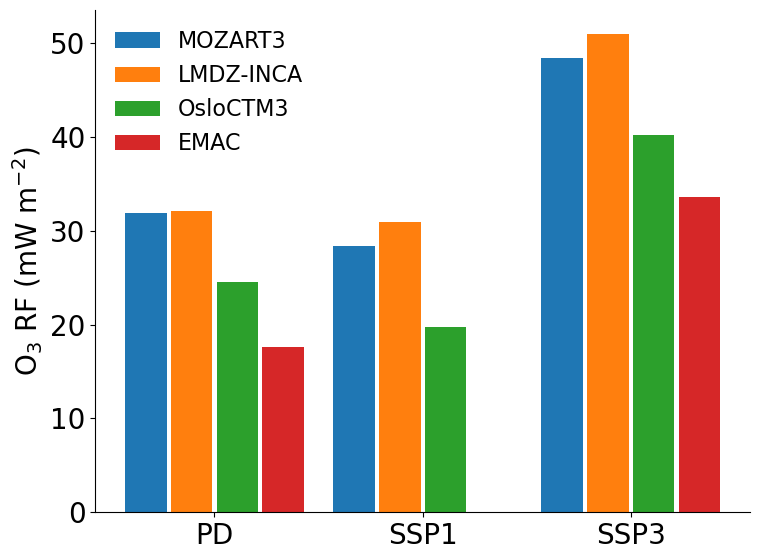

In [10]:
# Group data for plotting
# scale by 20 to 100% factor
group_data = [np.append(values_pd_b1_1*o3_rescaling_20_to_100*5,o3_Rf_diff_B1_2.sel(member='EMAC').O3_RF_sum.values), 
              values_ssp1_c1_1*o3_rescaling_20_to_100*5,
              np.append(values_ssp3_c1_1*o3_rescaling_20_to_100*5,o3_Rf_diff_SSP3_C1_2.sel(member='EMAC').O3_RF_sum.values)
              ]

#group_data = [values_pd_b1_1, values_ssp3_c1_1, values_ssp1_c1_1]
group_names = ['PD','SSP1', 'SSP3']

n_groups = len(group_names)
# Find the maximum number of models in any group
n_models = max(len(g) for g in group_data)
bar_width = 0.20
gap = 0.02
x = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each model index present in any group
for i in range(n_models):
    # For each group, get value if it exists, else np.nan
    heights = [group_data[g][i] if i < len(group_data[g]) else np.nan for g in range(n_groups)]
    offset = (i - (n_models-1)/2) * (bar_width + gap)
    color = colors[i] if i < len(colors) else None
    label = labels[i] if i < len(labels) else f'Model {i+1}'
    ax.bar(x + offset, heights, width=bar_width, color=color, label=label)

ax.set_xticks(x)
ax.set_xticklabels(group_names)
ax.set_ylabel('O$_3$ RF (mW m$^{-2}$)')
#ax.set_title('PD, SSP1 and SSP3 20% x5')
ax.legend(loc=2,fontsize=16,frameon=False)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()

In [11]:
print(group_data)
print(f'SSP1: {group_data[1].mean():.0f} ({group_data[1].min():.0f} - {group_data[1].max():.0f})')
print(f'SSP3: {group_data[2].mean():.0f} ({group_data[2].min():.0f} - {group_data[2].max():.0f})')
print(f'PD: {group_data[0].mean():.0f} ({group_data[0].min():.0f} - {group_data[0].max():.0f})')

[array([31.881095, 32.09878 , 24.558245, 17.6609  ]), array([28.425489, 30.97782 , 19.80748 ]), array([48.4664685, 51.00368  , 40.260785 , 33.6561   ])]
SSP1: 26 (20 - 31)
SSP3: 43 (34 - 51)
PD: 27 (18 - 32)


### Scaling by NOx emissions

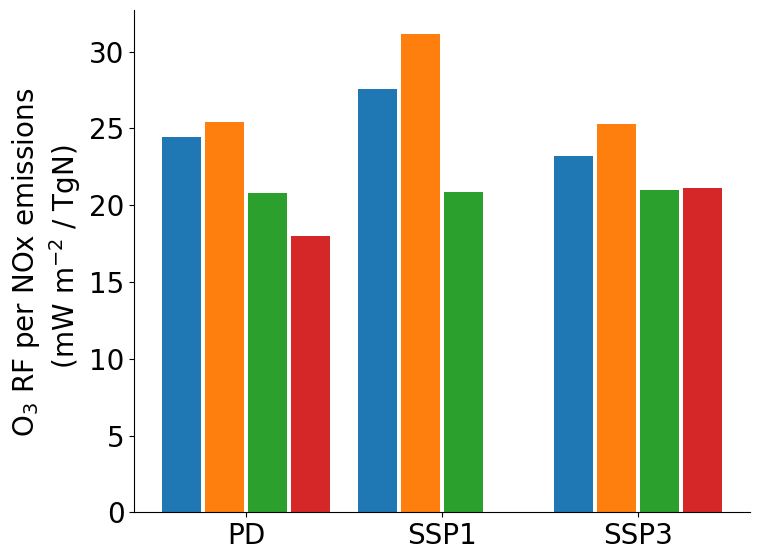

In [12]:
# Group data for plotting
group_data = [np.append(values_pd_b1_1/PD_20_NOx,o3_Rf_diff_B1_2.sel(member='EMAC').O3_RF_sum.values/(0.982)), 
              values_ssp1_c1_1/SSP1_20_NOx, 
              np.append(values_ssp3_c1_1/SSP3_20_NOx,o3_Rf_diff_SSP3_C1_2.sel(member='EMAC').O3_RF_sum.values/(1.595))]
group_names = ['PD', 'SSP1','SSP3']

n_groups = len(group_names)
# Find the maximum number of models in any group
n_models = max(len(g) for g in group_data)
bar_width = 0.20
gap = 0.02
x = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each model index present in any group
for i in range(n_models):
    # For each group, get value if it exists, else np.nan
    heights = [group_data[g][i] if i < len(group_data[g]) else np.nan for g in range(n_groups)]
    offset = (i - (n_models-1)/2) * (bar_width + gap)
    color = colors[i] if i < len(colors) else None
    label = labels[i] if i < len(labels) else f'Model {i+1}'
    ax.bar(x + offset, heights, width=bar_width, color=color, label=label)

ax.set_xticks(x)
ax.set_xticklabels(group_names)
#ax.set_ylim(0,7)
ax.set_ylabel('O$_3$ RF per NOx emissions \n (mW m$^{-2}$ / TgN)')
#ax.set_title('PD, SSP1 and SSP3 / TgN')
#ax.legend(loc=2,fontsize=16,frameon=False)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()

In [13]:
print(group_data)
print(f'SSP1: {group_data[1].mean():.0f} {group_data[1].min():.0f} - {group_data[1].max():.0f}')
print(f'SSP3: {group_data[2].mean():.0f} {group_data[2].min():.0f} - {group_data[2].max():.0f}')
print(f'PD: {group_data[0].mean():.0f} {group_data[0].min():.01f} - {group_data[0].max():.0f}')

[array([24.42986425, 25.38516533, 20.7845941 , 17.98462322]), array([27.57044674, 31.15227273, 20.88735632]), array([23.17250141, 25.28627451, 20.97473027, 21.10100313])]
SSP1: 27 21 - 31
SSP3: 23 21 - 25
PD: 22 18.0 - 25
